In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Use the below cell if you want to import data from drive , make sure that it is saved in my drive 

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# use the below commented line if you have run the previous cell otherwise go with data loading method.
#c3 = pd.read_excel('drive/MyDrive/1.8 transposed.xlsx',engine='openpyxl') 
c3 = pd.read_excel('Test Dataset.xlsx',engine='openpyxl')

### DATA PROCESSING AND CLEANING

In [ ]:
c3 = c3.iloc[1: , :]

In [ ]:
c3 = c3.reset_index()

In [ ]:
c3.head()

,index,AccelerationDecelerationOsc,"ADXR (14, EXPONENTIAL)","ADXR (14, EXPONENTIAL).1","ADXR (14, HULL)","ADXR (14, HULL).1","ADXR (14, SIMPLE)","ADXR (14, SIMPLE).1","ADXR (14, WEIGHTED)","ADXR (14, WEIGHTED).1","ADXR (14, WILDERS)","ADXR (14, WILDERS).1","ADXR (6, EXPONENTIAL)","ADXR (6, EXPONENTIAL).1","ADXR (6, HULL)","ADXR (6, HULL).1","ADXR (6, SIMPLE)","ADXR (6, SIMPLE).1","ADXR (6, WEIGHTED)","ADXR (6, WEIGHTED).1","ADXR (6, WILDERS)","ADXR (6, WILDERS).1","AM_Detector (4, 8, EXPONENTIAL)","AM_Detector (4, 8, HULL)","AM_Detector (4, 8, SIMPLE)","AM_Detector (4, 8, WEIGHTED)","AM_Detector (4, 8, WILDERS)","APTR (14, EXPONENTIAL)","APTR (14, HULL)","APTR (14, SIMPLE)","APTR (14, WEIGHTED)","APTR (14, WILDERS)","APTR (5, EXPONENTIAL)","APTR (5, HULL)","APTR (5, SIMPLE)","APTR (5, WEIGHTED)","APTR (5, WILDERS)",AroonIndicator (25),AroonIndicator (25).1,AroonIndicator (8),...,"SVEZLRBPercB (OHLC4, 18, 3, 2.0, 30, 3)","SVEZLRBPercB (OHLC4, 9, 3, 2.0, 30, 3)","SVEZLRBPercB (OHLC4, 9, 3, 2.0, 30, 3).1","TRIX (6, 10, CLOSE, 3)","TRIX (6, 10, CLOSE, 3).1","TRIX (6, 10, OHLC4, 3)","TRIX (6, 10, OHLC4, 3).1","TRIX (9, 14, CLOSE, 3)","TRIX (9, 14, CLOSE, 3).1","TRIX (9, 14, OHLC4, 3)","TRIX (9, 14, OHLC4, 3).1","UlcerIndex (CLOSE, 14, 5)","UlcerIndex (OHLC4, 14, 5)","UlcerIndex (OHLC4, 5, 5)","UlcerIndex (OHLC4, 9, 5)","VolatilitySwitch (OHLC4, 21)","DemandIndexDiffAbsnPct (3, 4, 252, 65, 53)","DemandIndexDiffAbsnPct (3, 4, 252, 65, 53).1","DemandIndexDiffAbsnPct (4, 4, 252, 2, 1)","DemandIndexDiffAbsnPct (4, 4, 252, 2, 1).1","DemandIndexDiffAbsnPct (6, 6, 252, 10, 9)","DemandIndexDiffAbsnPct (6, 6, 252, 10, 9).1","DemandIndexDiffAbsnPct (3, 5, 252, 15, 14)","DemandIndexDiffAbsnPct (3, 5, 252, 15, 14).1","DemandIndexDiffAbsnPct (3, 6, 252, 32, 30)","DemandIndexDiffAbsnPct (3, 6, 252, 32, 30).1","DemandIndexDiffAbsnPct (4, 6, 252, 28, 21)","DemandIndexDiffAbsnPct (4, 6, 252, 28, 21).1","DemandIndexDiffAbsnPct (2, 5, 252, 44, 42)","DemandIndexDiffAbsnPct (2, 5, 252, 44, 42).1","DemandIndexDiffAbsnPct (2, 6, 252, 45, 32)","DemandIndexDiffAbsnPct (2, 6, 252, 45, 32).1","DemandIndexDiffAbsnPct (2, 4, 252, 76, 20)","DemandIndexDiffAbsnPct (2, 4, 252, 76, 20).1","DemandIndexDiffAbsnPct (4, 5, 252, 72, 31)","DemandIndexDiffAbsnPct (4, 5, 252, 72, 31).1",UniversalOscillatorAdapted (5),"TrendQuality (3, 6, 2, squared, 250, 2)","TrendNoiseBalance (3, 6, 2, squared, 25",Output
0,1,0.137647,25.5711,26.7367,72.3316,120.773,22.8921,17.5971,24.2852,24.6344,15.5861,16.1706,45.5787,42.5323,130.108,111.536,51.3803,42.7372,59.7857,54.9576,30.3633,27.3191,0.526577,0.587106,0.48125,0.514861,0.519352,1.79639,1.66683,1.77741,1.75972,1.9313,1.71961,1.60123,1.60553,1.6707,1.74647,87.5,8.33333,57.1429,...,83.8649,77.2982,74.2708,25.5696,25.0415,23.5406,21.8643,18.684,17.3073,16.9594,15.5392,1.88549,1.55518,0.451686,0.357414,0.142857,-0.43,12.3,-0.36,19.84,-0.16,28.17,-0.33,14.29,-0.26,15.08,-0.17,27.78,-0.25,14.68,-0.2,15.08,-0.32,14.29,-0.25,24.6,-6.80911,0.855793,46.1147,2
1,2,-0.033494,23.4247,26.5811,72.7467,127.846,23.0277,17.1001,21.849,25.7778,14.6454,15.9258,46.513,44.2845,151.519,125.447,49.9953,44.5441,59.316,56.0892,28.2763,27.0152,0.476227,0.518255,0.466875,0.474583,0.491933,1.77059,1.60862,1.76896,1.73645,1.90784,1.68071,1.62079,1.72877,1.66982,1.71775,83.3333,4.16667,42.8571,...,78.0689,64.3232,79.719,18.3414,21.6914,18.6672,20.2657,17.1986,17.253,16.2204,15.8798,2.01696,1.64622,1.01,0.762314,0.190476,-0.56,5.16,-0.68,4.37,-0.22,24.6,-0.47,5.16,-0.39,6.35,-0.45,4.76,-0.45,2.78,-0.37,4.76,-0.54,3.17,-0.55,4.37,-10.52,0,0,2
2,3,-0.162101,21.4099,24.0514,72.277,122.001,23.4036,16.7062,19.6478,24.46,13.8059,15.1846,46.0388,47.5608,149.947,118.901,48.1497,45.1516,62.2058,61.0969,26.2639,27.8222,0.437065,0.405912,0.4525,0.4375,0.467941,1.69131,1.51653,1.7762,1.65739,1.85556,1.51247,1.54392,1.52428,1.48556,1.6094,79.1667,0,28.5714,...,65.3364,50.1228,84.5884,10.9921,16.3418,12.7403,16.503,14.9035,16.0782,14.5715,15.2256,1.15588,1.09839,1.35506,1.0171,

In [ ]:
del c3['index']

In [ ]:
c3['Date'] = pd.to_datetime(c3['Date'])

In [ ]:
c3['Date']

0      2013-10-07
1      2013-10-08
2      2013-10-09
3      2013-10-10
4      2013-10-11
          ...    
2022   2021-12-15
2023   2021-12-27
2024   2021-12-28
2025   2021-12-29
2026   2021-12-30
Name: Date, Length: 2027, dtype: datetime64[ns]

In [ ]:
c3['year'] = c3['Date'].dt.year
c3['month'] = c3['Date'].dt.month

In [ ]:
del c3['Date']

In [ ]:
c3.head()

,AccelerationDecelerationOsc,"ADXR (14, EXPONENTIAL)","ADXR (14, EXPONENTIAL).1","ADXR (14, HULL)","ADXR (14, HULL).1","ADXR (14, SIMPLE)","ADXR (14, SIMPLE).1","ADXR (14, WEIGHTED)","ADXR (14, WEIGHTED).1","ADXR (14, WILDERS)","ADXR (14, WILDERS).1","ADXR (6, EXPONENTIAL)","ADXR (6, EXPONENTIAL).1","ADXR (6, HULL)","ADXR (6, HULL).1","ADXR (6, SIMPLE)","ADXR (6, SIMPLE).1","ADXR (6, WEIGHTED)","ADXR (6, WEIGHTED).1","ADXR (6, WILDERS)","ADXR (6, WILDERS).1","AM_Detector (4, 8, EXPONENTIAL)","AM_Detector (4, 8, HULL)","AM_Detector (4, 8, SIMPLE)","AM_Detector (4, 8, WEIGHTED)","AM_Detector (4, 8, WILDERS)","APTR (14, EXPONENTIAL)","APTR (14, HULL)","APTR (14, SIMPLE)","APTR (14, WEIGHTED)","APTR (14, WILDERS)","APTR (5, EXPONENTIAL)","APTR (5, HULL)","APTR (5, SIMPLE)","APTR (5, WEIGHTED)","APTR (5, WILDERS)",AroonIndicator (25),AroonIndicator (25).1,AroonIndicator (8),AroonOscillator (25),...,"SVEZLRBPercB (OHLC4, 9, 3, 2.0, 30, 3).1","TRIX (6, 10, CLOSE, 3)","TRIX (6, 10, CLOSE, 3).1","TRIX (6, 10, OHLC4, 3)","TRIX (6, 10, OHLC4, 3).1","TRIX (9, 14, CLOSE, 3)","TRIX (9, 14, CLOSE, 3).1","TRIX (9, 14, OHLC4, 3)","TRIX (9, 14, OHLC4, 3).1","UlcerIndex (CLOSE, 14, 5)","UlcerIndex (OHLC4, 14, 5)","UlcerIndex (OHLC4, 5, 5)","UlcerIndex (OHLC4, 9, 5)","VolatilitySwitch (OHLC4, 21)","DemandIndexDiffAbsnPct (3, 4, 252, 65, 53)","DemandIndexDiffAbsnPct (3, 4, 252, 65, 53).1","DemandIndexDiffAbsnPct (4, 4, 252, 2, 1)","DemandIndexDiffAbsnPct (4, 4, 252, 2, 1).1","DemandIndexDiffAbsnPct (6, 6, 252, 10, 9)","DemandIndexDiffAbsnPct (6, 6, 252, 10, 9).1","DemandIndexDiffAbsnPct (3, 5, 252, 15, 14)","DemandIndexDiffAbsnPct (3, 5, 252, 15, 14).1","DemandIndexDiffAbsnPct (3, 6, 252, 32, 30)","DemandIndexDiffAbsnPct (3, 6, 252, 32, 30).1","DemandIndexDiffAbsnPct (4, 6, 252, 28, 21)","DemandIndexDiffAbsnPct (4, 6, 252, 28, 21).1","DemandIndexDiffAbsnPct (2, 5, 252, 44, 42)","DemandIndexDiffAbsnPct (2, 5, 252, 44, 42).1","DemandIndexDiffAbsnPct (2, 6, 252, 45, 32)","DemandIndexDiffAbsnPct (2, 6, 252, 45, 32).1","DemandIndexDiffAbsnPct (2, 4, 252, 76, 20)","DemandIndexDiffAbsnPct (2, 4, 252, 76, 20).1","DemandIndexDiffAbsnPct (4, 5, 252, 72, 31)","DemandIndexDiffAbsnPct (4, 5, 252, 72, 31).1",UniversalOscillatorAdapted (5),"TrendQuality (3, 6, 2, squared, 250, 2)","TrendNoiseBalance (3, 6, 2, squared, 25",Output,year,month
0,0.137647,25.5711,26.7367,72.3316,120.773,22.8921,17.5971,24.2852,24.6344,15.5861,16.1706,45.5787,42.5323,130.108,111.536,51.3803,42.7372,59.7857,54.9576,30.3633,27.3191,0.526577,0.587106,0.48125,0.514861,0.519352,1.79639,1.66683,1.77741,1.75972,1.9313,1.71961,1.60123,1.60553,1.6707,1.74647,87.5,8.33333,57.1429,79.1667,...,74.2708,25.5696,25.0415,23.5406,21.8643,18.684,17.3073,16.9594,15.5392,1.88549,1.55518,0.451686,0.357414,0.142857,-0.43,12.3,-0.36,19.84,-0.16,28.17,-0.33,14.29,-0.26,15.08,-0.17,27.78,-0.25,14.68,-0.2,15.08,-0.32,14.29,-0.25,24.6,-6.80911,0.855793,46.1147,2,2013,10
1,-0.033494,23.4247,26.5811,72.7467,127.846,23.0277,17.1001,21.849,25.7778,14.6454,15.9258,46.513,44.2845,151.519,125.447,49.9953,44.5441,59.316,56.0892,28.2763,27.0152,0.476227,0.518255,0.466875,0.474583,0.491933,1.77059,1.60862,1.76896,1.73645,1.90784,1.68071,1.62079,1.72877,1.66982,1.71775,83.3333,4.16667,42.8571,79.1667,...,79.719,18.3414,21.6914,18.6672,20.2657,17.1986,17.253,16.2204,15.8798,2.01696,1.64622,1.01,0.762314,0.190476,-0.56,5.16,-0.68,4.37,-0.22,24.6,-0.47,5.16,-0.39,6.35,-0.45,4.76,-0.45,2.78,-0.37,4.76,-0.54,3.17,-0.55,4.37,-10.52,0,0,2,2013,10
2,-0.162101,21.4099,24.0514,72.277,122.001,23.4036,16.7062,19.6478,24.46,13.8059,15.1846,46.0388,47.5608,149.947,118.901,48.1497,45.1516,62.2058,61.0969,26.2639,27.8222,0.437065,0.405912,0.4525,0.4375,0.467941,1.69131,1.51653,1.7762,1.65739,1.85556,1.51247,1.54392,1.52428,1.48556,1.6094,79.1667,0,28.5714,79.1667,...,84.5884,10.9921,16.3418,12.7403,16.503,14.9035,16.0782,14.5715,15.2256,1.15588,1.09839,1.35506,1.0171,0.047619,-0.4,15.87,-0.42,17.06,-0.28,21.03,-0.34,13.1,-0.3,13.49,-0.31

In [ ]:
c3 = c3.replace("55-0.2",0.2)

In [ ]:
c3 = c3.apply(pd.to_numeric)


In [ ]:
c3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Columns: 1034 entries, AccelerationDecelerationOsc to month
dtypes: float64(1027), int64(7)
memory usage: 16.0 MB


In [ ]:
c3.isna().sum().sum()

539

In [ ]:
for i in c3:
  c3[i] =c3[i].fillna(c3[i].median())
  

In [ ]:
c3.isna().sum().sum()

0

In [ ]:
c1 = c3.copy(deep=True)

In [ ]:
# c3.to_excel("New Test.xlsx",index=False)

In [ ]:
target = c3['Output']


In [ ]:
X1 = c3.drop('Output',axis=1)
y1 = c3['Output']

### BACKWARD ELIMINATION

USING BACKWARD ELEIMINATION TO FILTER OUT IMPORTANT COLUMNS. THESE FILTERED COLUMNS WILL LATER BE FEEDED TO THE AUTOENCODER

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_1 = sm.add_constant(X1)
#Fitting sm.OLS model
model = sm.OLS(y1,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                      0.559965
AccelerationDecelerationOsc                0.083746
ADXR (14, EXPONENTIAL)                     0.058807
ADXR (14, EXPONENTIAL).1                   0.170373
ADXR (14, HULL)                            0.005167
                                             ...   
UniversalOscillatorAdapted (5)             0.712645
TrendQuality (3, 6, 2, squared, 250, 2)    0.076717
TrendNoiseBalance (3, 6, 2, squared, 25    0.363391
year                                       0.111148
month                                      0.430892
Length: 1034, dtype: float64

### NOTE:
THE BELOW CELL WILL APPROXIMATELY TAKE 10-15 MINS TO EXECUTE .

In [ ]:
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['AccelerationDecelerationOsc', 'ADXR (14, EXPONENTIAL)', 'ADXR (14, HULL)', 'ADXR (14, HULL).1', 'ADXR (14, SIMPLE).1', 'ADXR (14, WEIGHTED).1', 'ADXR (14, WILDERS)', 'ADXR (6, EXPONENTIAL)', 'ADXR (6, SIMPLE)', 'ADXR (6, SIMPLE).1', 'ADXR (6, WILDERS)', 'AM_Detector (4, 8, WILDERS)', 'APTR (14, EXPONENTIAL)', 'APTR (14, SIMPLE)', 'APTR (14, WEIGHTED)', 'AroonIndicator (25).1', 'AroonIndicator (8)', 'AroonOscillator (25)', 'AwesomeOscillator', 'BalanceOfMarketPower (EXPONENTIAL 6)', 'BalanceOfMarketPower (WILDERS, 14)', 'BalanceOfMarketPower (WILDERS, 6)', 'BandpassFilter (20, 0.1, 1)', 'BandpassFilter (8, 0.1, 1)', 'BollingerPercentB (WEIGHTED, VWAP, 0, 1', 'BollingerPercentB (WEIGHTED, VWAP, 0, 2', 'BollingerPercentBExp20', 'CorrelationTrendIndicator (20)', 'CPMO (35, 20, 10, SPX).1', 'CSI (1.0, 14, 25.0, 1000.0, EXPONENTIAL)', 'CSI (1.0, 14, 25.0, 1000.0, SIMPLE)', 'CSI (1.0, 14, 25.0, 1000.0, WEIGHTED)', 'CSI (1.0, 14, 25.0, 1000.0, WILDERS)', 'DemandIndex (11)', 'DemandIndex (8)'

In [ ]:
lst =[]
lst =selected_features_BE

In [ ]:
rt = pd.DataFrame(c3[lst])


In [ ]:
rt['Output'] = target

In [ ]:
X = rt.drop('Output',axis=1)
y = rt['Output']

FROM 1033 COLUMNS WE HAVE SELECTED APPROXIMATELY 280 IMPORTANT COLUMNS

#### AUTOENCODING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_datasets(X_train, X_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(X_train),
      columns=X_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(X_test),
      columns = X_test.columns
  )
  
  return x_train_scaled, x_test_scaled
  
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [ ]:
x_train_scaled.isna().sum().sum()

0

In [ ]:
x_test_scaled.isna().sum().sum()

0

In [ ]:
from tensorflow.keras import Model,Input
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

In [ ]:

ncol = x_train_scaled.shape[1]
ncol

277

In [ ]:
encoding_dim =20

In [ ]:
import keras
import tensorflow as tf

In [ ]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoder = keras.models.Sequential([
  keras.layers.Dense(200, activation = 'relu', input_shape=[277]),
  Dense(100, activation = 'relu'),
  Dense(50, activation = 'relu'),
 # Dense(60, activation = 'relu'),
  #Dense(30, activation = 'relu'),
  Dense(encoding_dim, activation = 'relu')
])

decoder = keras.models.Sequential([
  keras.layers.Dense(50, activation = 'relu', input_shape=[encoding_dim]),
  Dense(100, activation = 'relu'),
  Dense(200, activation = 'relu'),
  #Dense(400, activation = 'relu'),
  #Dense(800, activation = 'relu'),
  Dense(277, activation = 'sigmoid')
])

stacked_ae = keras.models.Sequential([encoder, decoder])


In [ ]:
stacked_ae.summary()
encoder.summary()
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 20)                81770     
                                                                 
 sequential_1 (Sequential)   (None, 277)               82027     
                                                                 
Total params: 163,797
Trainable params: 163,797
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               55600     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)            

In [ ]:

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
stacked_ae.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=[rounded_accuracy])

In [ ]:
stacked_ae.fit(x_train_scaled.values, x_train_scaled.values,epochs = 21, batch_size = 32, shuffle = False,validation_data=(x_test_scaled.values, x_test_scaled.values))

Epoch 1/21
43/43 [==============================] - 1s 8ms/step - loss: 0.6497 - rounded_accuracy: 0.6743 - val_loss: 0.6300 - val_rounded_accuracy: 0.7342
Epoch 2/21
43/43 [==============================] - 0s 4ms/step - loss: 0.6155 - rounded_accuracy: 0.7884 - val_loss: 0.6015 - val_rounded_accuracy: 0.8331
Epoch 3/21
43/43 [==============================] - 0s 4ms/step - loss: 0.5975 - rounded_accuracy: 0.8422 - val_loss: 0.5943 - val_rounded_accuracy: 0.8473
Epoch 4/21
43/43 [==============================] - 0s 5ms/step - loss: 0.5932 - rounded_accuracy: 0.8485 - val_loss: 0.5916 - val_rounded_accuracy: 0.8511
Epoch 5/21
43/43 [==============================] - 0s 5ms/step - loss: 0.5902 - rounded_accuracy: 0.8568 - val_loss: 0.5874 - val_rounded_accuracy: 0.8649
Epoch 6/21
43/43 [==============================] - 0s 5ms/step - loss: 0.5854 - rounded_accuracy: 0.8701 - val_loss: 0.5834 - val_rounded_accuracy: 0.8734
Epoch 7/21
43/43 [==============================] - 0s 5ms/step 

In [ ]:
encoder_layer = stacked_ae.get_layer('sequential')

In [ ]:
fc = pd.DataFrame(encoder_layer.predict(x_train_scaled))
fc = fc.add_prefix('feature_')

In [ ]:
fc['target'] = target

In [ ]:
fc.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,5.848542,4.597788,2.090986,4.184164,3.486763,0.0,0.0,0.588654,1.922897,0.699916,1.717253,0.000000,1.116614,0.0,3.285729,4.891742,4.234894,4.550456,0.0,0.0,2
1,3.690472,3.465256,2.540963,3.901845,3.670861,0.0,0.0,0.000000,2.431295,1.118271,2.922976,0.000000,0.225244,0.0,2.533271,4.594973,5.751458,5.852697,0.0,0.0,2
2,4.150273,5.690341,2.574175,2.355637,3.746902,0.0,0.0,0.773879,2.370659,1.426916,1.916409,0.134964,0.788628,0.0,4.137576,3.275564,3.763237,2.758321,0.0,0.0,2
3,5.162079,2.207321,1.344088,4.677194,2.186605,0.0,0.0,0.461523,2.051918,0.688185,1.399773,0.000000,0.470539,0.0,0.680097,4.340216,4.876615,5.410196,0.0,0.0,2
4,3.403424,2.611434,2.496387,0.787465,4.758105,0.0,0.0,0.000000,2.373751,0.000000,2.334891,0.000000,0.821549,0.0,2.464468,4.433143,2.559212,5.173135,0.0,0.0,2


In [ ]:
fc1 = fc.copy()

In [ ]:
(fc==0).sum()

feature_0        0
feature_1        5
feature_2        7
feature_3       16
feature_4        3
feature_5     1324
feature_6     1358
feature_7      775
feature_8       29
feature_9       14
feature_10       9
feature_11     658
feature_12     114
feature_13    1358
feature_14      19
feature_15       0
feature_16       3
feature_17       4
feature_18    1358
feature_19    1358
target         344
dtype: int64

In [ ]:
drp = fc.loc[:, (fc == 0).all()]
drp

,feature_6,feature_13,feature_18,feature_19
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1353,0.0,0.0,0.0,0.0
1354,0.0,0.0,0.0,0.0
1355,0.0,0.0,0.0,0.0
1356,0.0,0.0,0.0,0.0


In [ ]:
fc = fc.drop(drp,axis=1)

In [ ]:
fc.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_14,feature_15,feature_16,feature_17,target
0,5.848542,4.597788,2.090986,4.184164,3.486763,0.0,0.588654,1.922897,0.699916,1.717253,0.000000,1.116614,3.285729,4.891742,4.234894,4.550456,2
1,3.690472,3.465256,2.540963,3.901845,3.670861,0.0,0.000000,2.431295,1.118271,2.922976,0.000000,0.225244,2.533271,4.594973,5.751458,5.852697,2
2,4.150273,5.690341,2.574175,2.355637,3.746902,0.0,0.773879,2.370659,1.426916,1.916409,0.134964,0.788628,4.137576,3.275564,3.763237,2.758321,2
3,5.162079,2.207321,1.344088,4.677194,2.186605,0.0,0.461523,2.051918,0.688185,1.399773,0.000000,0.470539,0.680097,4.340216,4.876615,5.410196,2
4,3.403424,2.611434,2.496387,0.787465,4.758105,0.0,0.000000,2.373751,0.000000,2.334891,0.000000,0.821549,2.464468,4.433143,2.559212,5.173135,2


In [ ]:
for i in fc:
  count = (fc[i] == 0).sum()
  if (count>700) and (i!='target'):
    fc = fc.drop(i,axis=1)



### FINAL DATA

In [ ]:
fc.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_8,feature_9,feature_10,feature_11,feature_12,feature_14,feature_15,feature_16,feature_17,target
0,5.848542,4.597788,2.090986,4.184164,3.486763,1.922897,0.699916,1.717253,0.000000,1.116614,3.285729,4.891742,4.234894,4.550456,2
1,3.690472,3.465256,2.540963,3.901845,3.670861,2.431295,1.118271,2.922976,0.000000,0.225244,2.533271,4.594973,5.751458,5.852697,2
2,4.150273,5.690341,2.574175,2.355637,3.746902,2.370659,1.426916,1.916409,0.134964,0.788628,4.137576,3.275564,3.763237,2.758321,2
3,5.162079,2.207321,1.344088,4.677194,2.186605,2.051918,0.688185,1.399773,0.000000,0.470539,0.680097,4.340216,4.876615,5.410196,2
4,3.403424,2.611434,2.496387,0.787465,4.758105,2.373751,0.000000,2.334891,0.000000,0.821549,2.464468,4.433143,2.559212,5.173135,2


###EDA

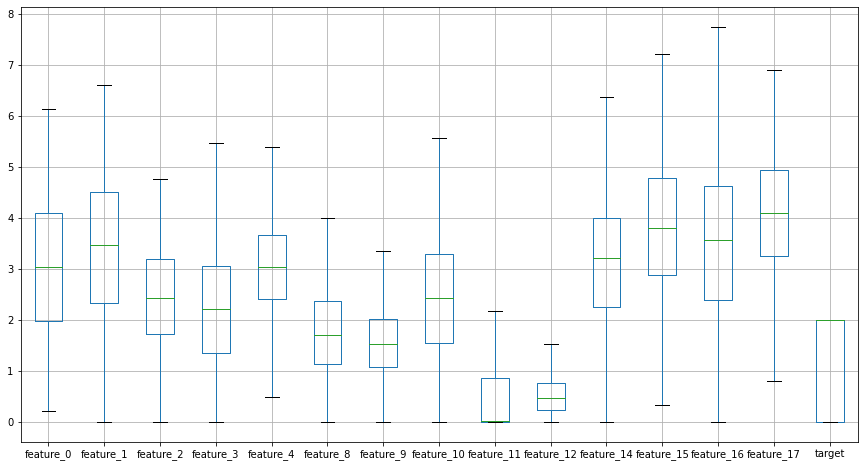

In [ ]:
plt.figure(figsize=(15,8))
fc.boxplot(showfliers=False)

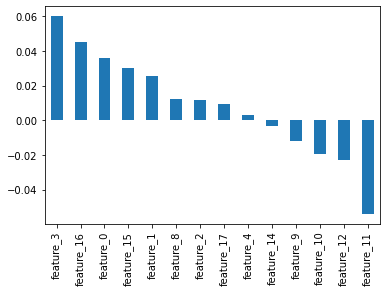

In [ ]:
fc.corr()['target'][:-1].sort_values(ascending=False).plot(kind='bar')

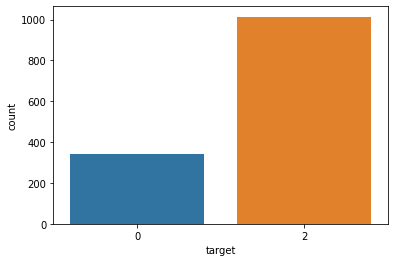

In [ ]:
sns.countplot(x='target',data=fc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


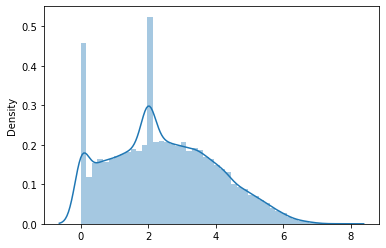

In [ ]:
sns.distplot(fc)

#### RANDOM SAMPLING AND TRAIN TEST SPLITTING

In [ ]:
A1 = fc.drop('target',axis=1)
b1 = fc['target']

In [ ]:
import collections

In [ ]:
print(collections.Counter(b1))

Counter({2: 1014, 0: 344})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(A1, b1)
print(f"Oversampled:k{collections.Counter(y_over)}")


Oversampled:kCounter({2: 1014, 0: 507})


In [ ]:

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling:{collections.Counter(y_combined_sampling)}")


Combined Random Sampling:Counter({2: 633, 0: 507})


In [ ]:
A = X_combined_sampling
b = y_combined_sampling

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.30, random_state=101)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)

In [ ]:
rfc.fit(A_train,b_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
predictions = rfc.predict(A_test)

In [ ]:
print(classification_report(b_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       160
           2       0.69      0.80      0.74       182

    accuracy                           0.70       342
   macro avg       0.70      0.69      0.69       342
weighted avg       0.70      0.70      0.69       342



XGboost 

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:

xg = XGBClassifier()
xg.fit(A_train, b_train)

XGBClassifier()

In [ ]:

y_pred = xg.predict(A_test)

In [ ]:
print(classification_report(b_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59       160
           2       0.64      0.74      0.69       182

    accuracy                           0.64       342
   macro avg       0.64      0.64      0.64       342
weighted avg       0.64      0.64      0.64       342



### PARAMETER TUNED XGBoost

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(A,b), verbose=3, random_state=1001 )


In [ ]:
random_search.fit(A,b)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f5407796dd0>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
print(random_search.best_estimator_)

XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=5,
              n_estimators=600, nthread=1, silent=True, subsample=0.6)


In [ ]:
print(random_search.best_params_)


{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [ ]:
best_random = random_search.best_estimator_

In [ ]:
pred = best_random.predict(A_test)

In [ ]:
print(classification_report(b_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       160
           2       0.97      1.00      0.98       182

    accuracy                           0.98       342
   macro avg       0.98      0.98      0.98       342
weighted avg       0.98      0.98      0.98       342



In [ ]:
result = pd.DataFrame(pred,columns=['Output'])

In [ ]:
result.to_csv('submission_file.csv', index=False)